# Merging Clean Datasets

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# import all the df

rainfall = pd.read_csv("../01_exploratory_data_analysis/rainfall/dataset_rainfall.csv")
unemp = pd.read_csv("gdp_unemployment/gdppcap unemp and gini.csv")
protest = pd.read_csv("protests/yearly_protest_data.csv")

In [3]:
rainfall.columns

Index(['Unnamed: 0', 'ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'yearly_avg_rainfall', 'rainfall_var_t', 'rainfall_var_t_1',
       'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1'],
      dtype='object')

In [4]:
rainfall = rainfall.drop('Unnamed: 0', axis=1)
rainfall = rainfall[['ISO3_code', 'Year', 'country', 
       'yearly_avg_rainfall', 'rainfall_var_t', 'rainfall_var_t_1',
       'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'ethnic_fractionation_index', 'gdp']]
rainfall.country.nunique()

138

In [5]:
unemp = unemp.drop (['Unnamed: 0', 'pop'], axis=1)
unemp.country.nunique()

191

In [6]:
protest = protest.drop('Unnamed: 0', axis = 1)
protest = protest.rename(columns= {'year':'Year'})
protest.country.nunique()

136

In [7]:
## Merge the two dataframes on column country and check for differences in country names
unemp_c= unemp[['country', 'ISO3_code']].copy()
rainfall_c= rainfall[['country', 'ISO3_code']].copy()

merged_df = pd.merge(unemp_c, rainfall_c, on='ISO3_code', suffixes=('_unemp', '_rain'))

# Check if values of column 'b' are equal in both dataframes
merged_df['b_equal'] = merged_df['country_unemp'] == merged_df['country_rain']
merged_df

,country_unemp,ISO3_code,country_rain,b_equal
0,Afghanistan,AFG,Afghanistan,True
1,Afghanistan,AFG,Afghanistan,True
2,Afghanistan,AFG,Afghanistan,True
3,Afghanistan,AFG,Afghanistan,True
4,Afghanistan,AFG,Afghanistan,True
...,...,...,...,...
566587,Zimbabwe,ZWE,Zimbabwe,True
566588,Zimbabwe,ZWE,Zimbabwe,True
566589,Zimbabwe,ZWE,Zimbabwe,True
566590,Zimbabwe,ZWE,Zimbabwe,True


In [8]:
merged_df[merged_df['b_equal']==False]['country_rain'].unique()

array(['Republic of Korea', 'United States of America'], dtype=object)

In [9]:
#USA and Korea are diff in rainfall and unemp - change to rainfall names
unemp.loc[unemp['country']=='United States', 'country']='United States of America'
unemp.loc[unemp['country']=='South Korea', 'country']= 'Republic of Korea'

#repeat step above to check
## Merge the two dataframes on column country and check for differences in country names
unemp_c= unemp[['country', 'ISO3_code']].copy()
rainfall_c= rainfall[['country', 'ISO3_code']].copy()

merged_df = pd.merge(unemp_c, rainfall_c, on='ISO3_code', suffixes=('_unemp', '_rain'))

# Check if values of column 'b' are equal in both dataframes
merged_df['b_equal'] = merged_df['country_unemp'] == merged_df['country_rain']
merged_df[merged_df['b_equal']==False]['country_rain'].unique()

array([], dtype=object)

In [10]:
# merging rainfall and gdp data - limited by the rainfall data
df = rainfall.merge(unemp, on= ['ISO3_code', 'Year', 'country'], how='inner')

In [11]:
df.country.nunique()

138

In [12]:
df.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_percap', 'gdp_percap_pchange',
       'gdp_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange'],
      dtype='object')

In [13]:
df = df[['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange',  'unemp_rate', 'unemp_rate_pchange',
       'gini', 'gini_pchange']]



In [14]:
df= df.sort_values(by=['country', 'Year'])
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Lithuania', 'Madagascar', 'M

In [15]:
protest = protest.sort_values(by=['country', 'Year'])
protest.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'M

In [16]:
fulldf = df.merge(protest, on = ['country', 'Year'], how='outer')
fulldf.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

In [17]:
fulldf.sample(10)

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
8686,UKR,2014,Ukraine,439.446726,-0.096938,0.001471,94.277976,0.007589,0.037324,10.154608,...,-10.078903,16978.8120,-5.088464,9.270,29.288703,0.240254,-2.156874,45972380.0,346275.0,0.007532
848,BTN,1960,Bhutan,973.764706,-0.082900,-0.082900,49.710784,-0.053348,-0.053348,39.829353,...,NaN,3338.0095,NaN,1.374,NaN,0.367399,NaN,NaN,NaN,NaN
4563,LAO,1974,Laos,1702.382035,0.222035,-0.139364,229.350649,-0.026948,0.010209,51.852707,...,0.000000,2005.5005,0.000000,0.708,0.000000,0.353252,0.000000,NaN,NaN,NaN
7798,SDN,1976,Sudan,180.809621,-0.022522,-0.057012,274.859892,0.018773,0.004391,34.377686,...,16.665219,2460.1887,0.000000,7.530,0.000000,0.348189,0.000000,NaN,NaN,NaN
2321,DJI,2021,Djibouti,115.270833,-0.280354,0.179308,290.322917,0.003565,-0.005942,1.839329,...,4.522346,5947.8610,3.025242,27.548,-0.350877,0.427013,0.000000,NaN,NaN,NaN
4241,JPN,1985,Japan,1351.293249,0.392710,-0.258327,106.381857,0.059950,-0.043783,1.892111,...,5.159806,35466.0860,0.000000,2.059,0.000000,0.332658,0.000000,NaN,NaN,NaN
6222,OMN,1986,Oman,41.184748,1.680876,-0.250355,270.496855,-0.004617,0.011550,3.427816,...,2.002160,35201.5500,0.000000,1.460,0.000000,NaN,NaN,NaN,NaN,NaN
8725,ARE,1989,United Arab Emirates,62.591954,-0.021957,-0.191469,270.054598,-0.025428,0.001454,1.193026,...,12.337894,65784.6800,0.000000,1.640,0.000000,0.294547,0.000000,NaN,NaN,NaN
6956,RUS,1993,Russia,354.541121,0.000329,-0.009569,-57.666809,-0.060781,0.114720,7.557204,...,-8.668535,22122.2910,-8.619683,5.883,13.549508,0.453855,14.920004,NaN,NaN,NaN
6851,KOR,2016,Republic of Korea,1077.029915,0.226327,-0.138986,125.839744,0.030968,0.029818,1.859035,...,2.946886,43674.5080,2.539149,3.650,2.932882,0.352222,7.202572,NaN,NaN,NaN


In [26]:
fulldf.to_csv("merged_df.csv")

In [19]:
fulldf.head(15)

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
0,AFG,1960,Afghanistan,318.565807,-0.075064,-0.075064,116.206019,0.036755,0.036755,38.62789,...,NaN,1454.1108,NaN,7.908,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,1961,Afghanistan,294.653108,-0.075064,-0.075064,120.477183,0.036755,0.036755,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
2,AFG,1962,Afghanistan,243.503638,-0.173592,-0.075064,117.250992,-0.026778,0.036755,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
3,AFG,1963,Afghanistan,307.702050,0.263645,-0.173592,126.046296,0.075013,-0.026778,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
4,AFG,1964,Afghanistan,300.362434,-0.023853,0.263645,110.172619,-0.125935,0.075013,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
5,AFG,1965,Afghanistan,320.094246,0.065693,-0.023853,119.834656,0.087699,-0.125935,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
6,AFG,1966,Afghanistan,267.692460,-0.163707,0.065693,122.915344,0.025708,0.087699,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
7,AFG,1967,Afghanistan,330.657077,0.235213,-0.163707,117.043651,-0.047770,0.025708,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
8,AFG,1968,Afghanistan,315.201058,-0.046743,0.235213,117.498016,0.003882,-0.047770,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN
9,AFG,1969,Afghanistan,331.842262,0.052796,-0.046743,113.670966,-0.032571,0.003882,38.62789,...,0.0,1454.1108,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN


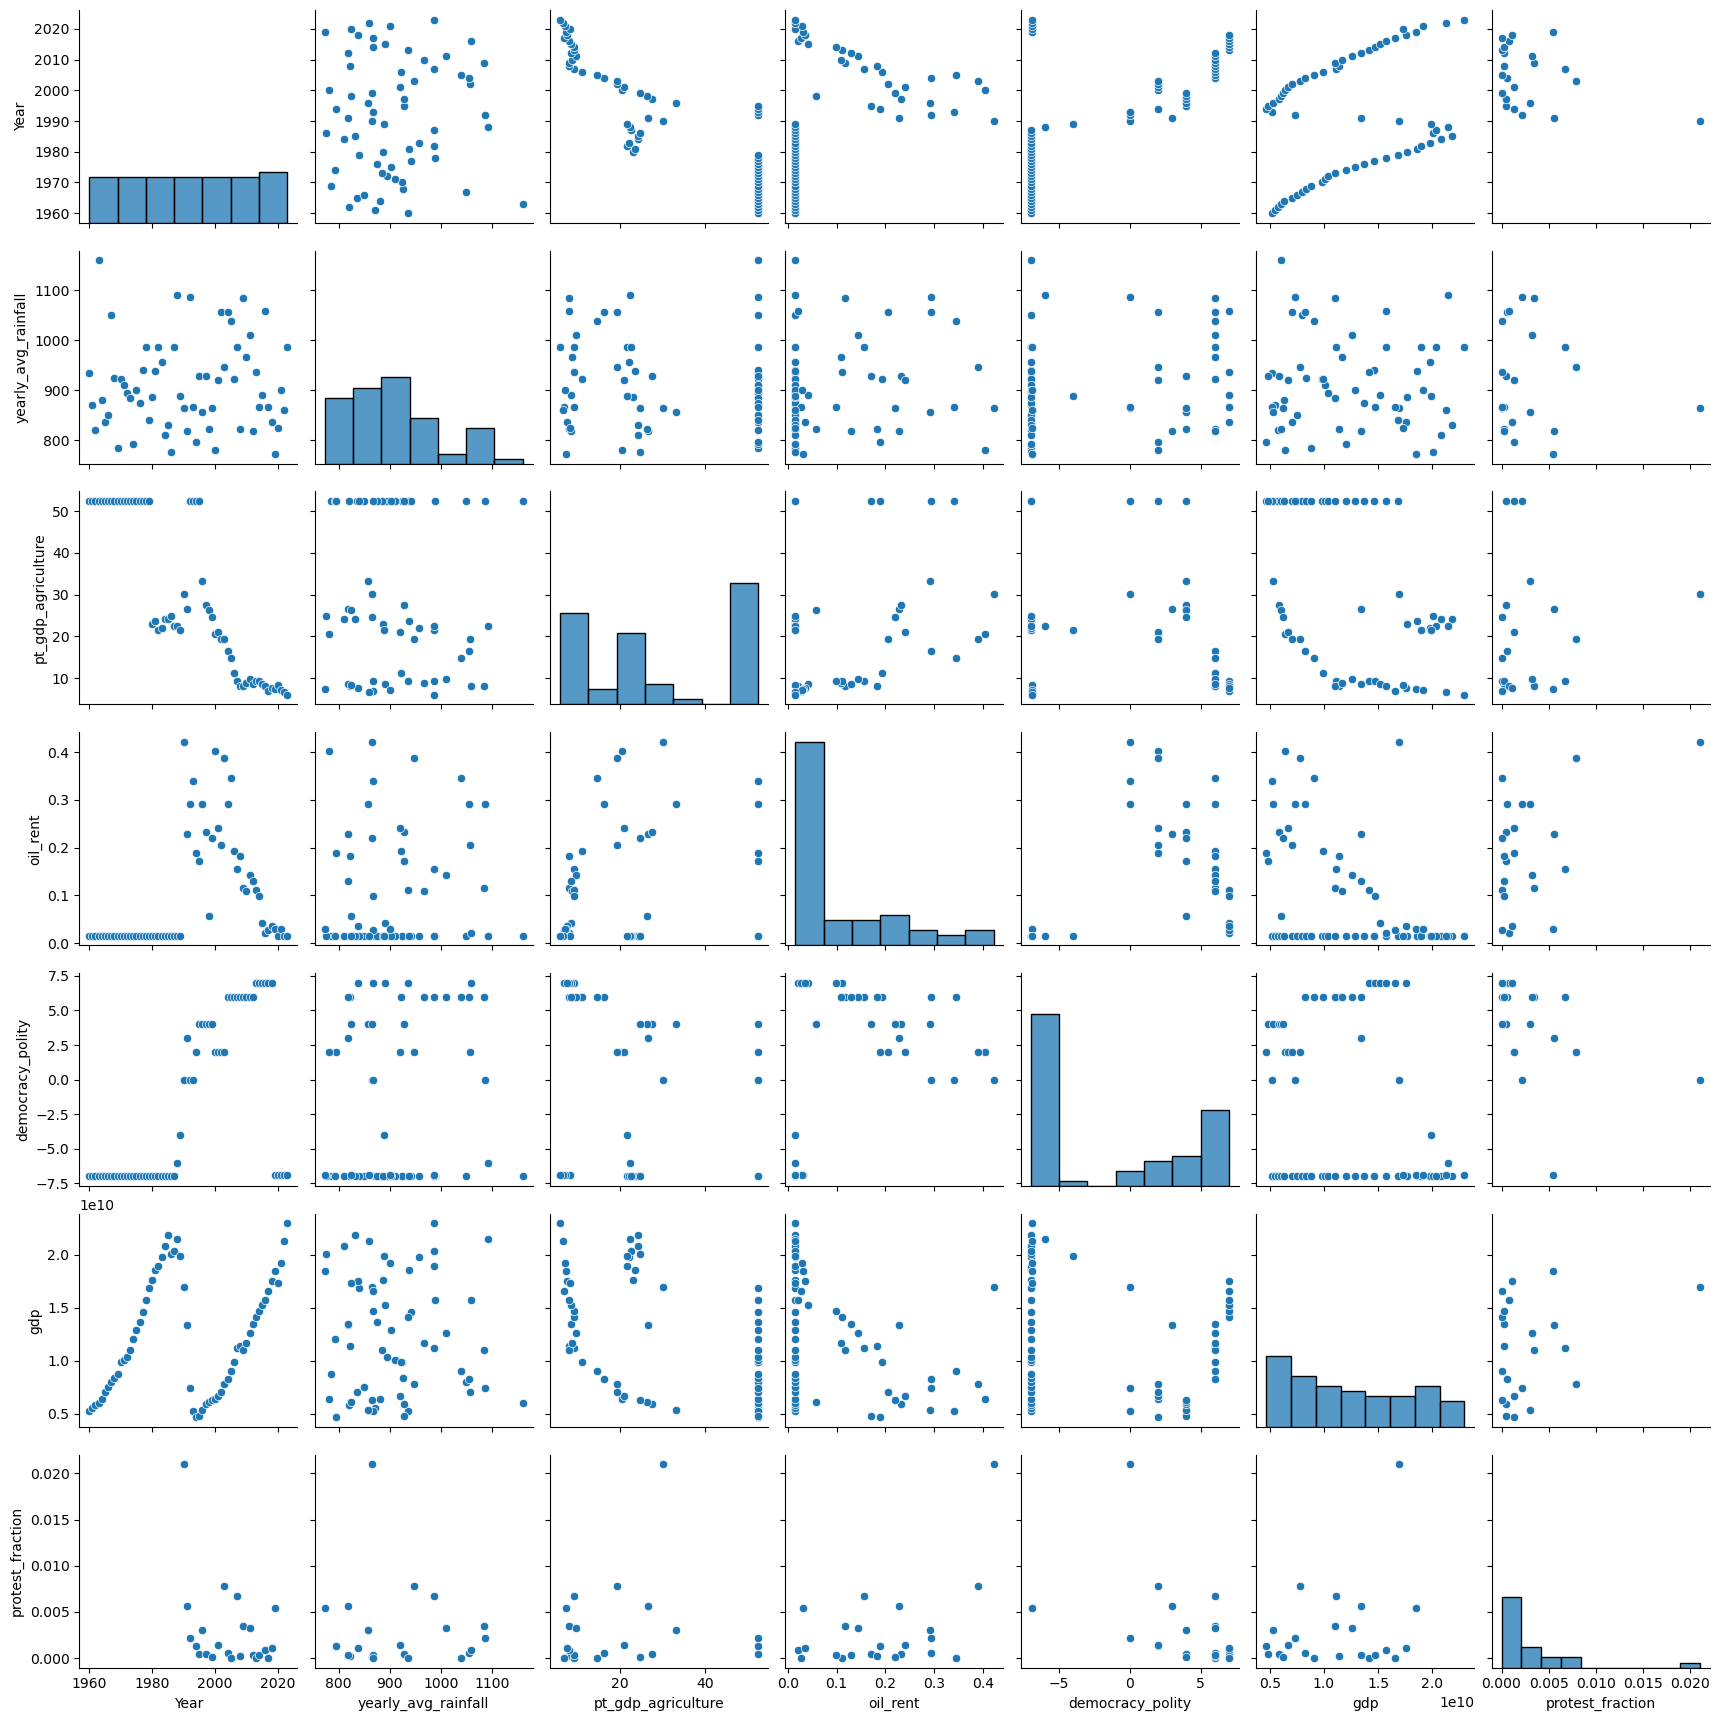

In [20]:
georgia = fulldf[fulldf['country'] == 'Georgia']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(georgia[feats])

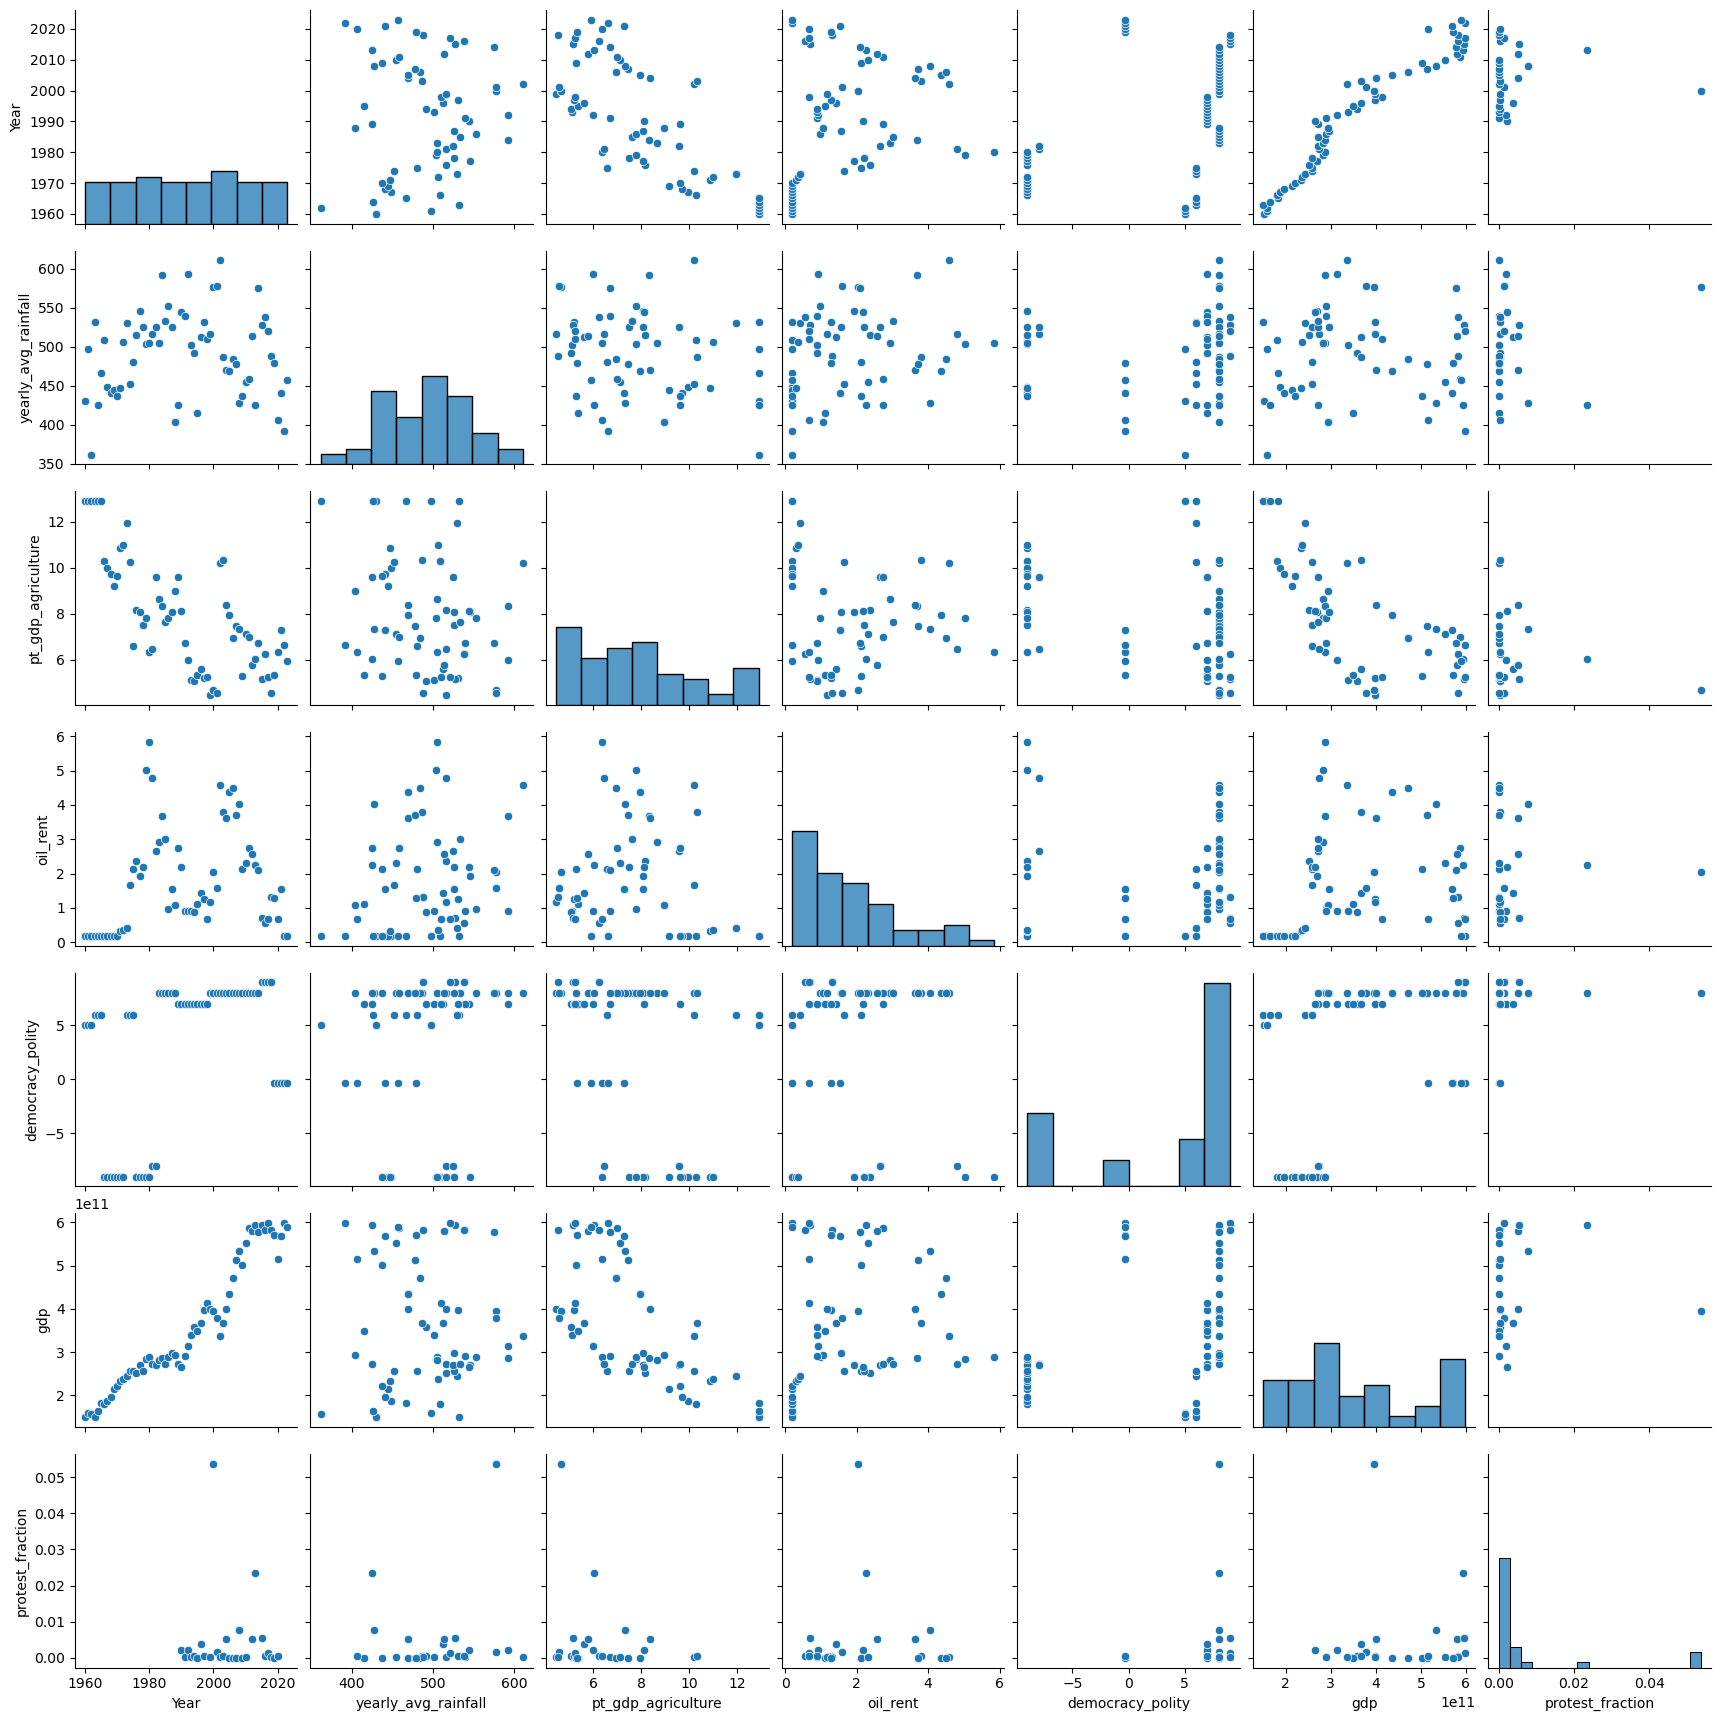

In [21]:
country = fulldf[fulldf['country'] == 'Argentina']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

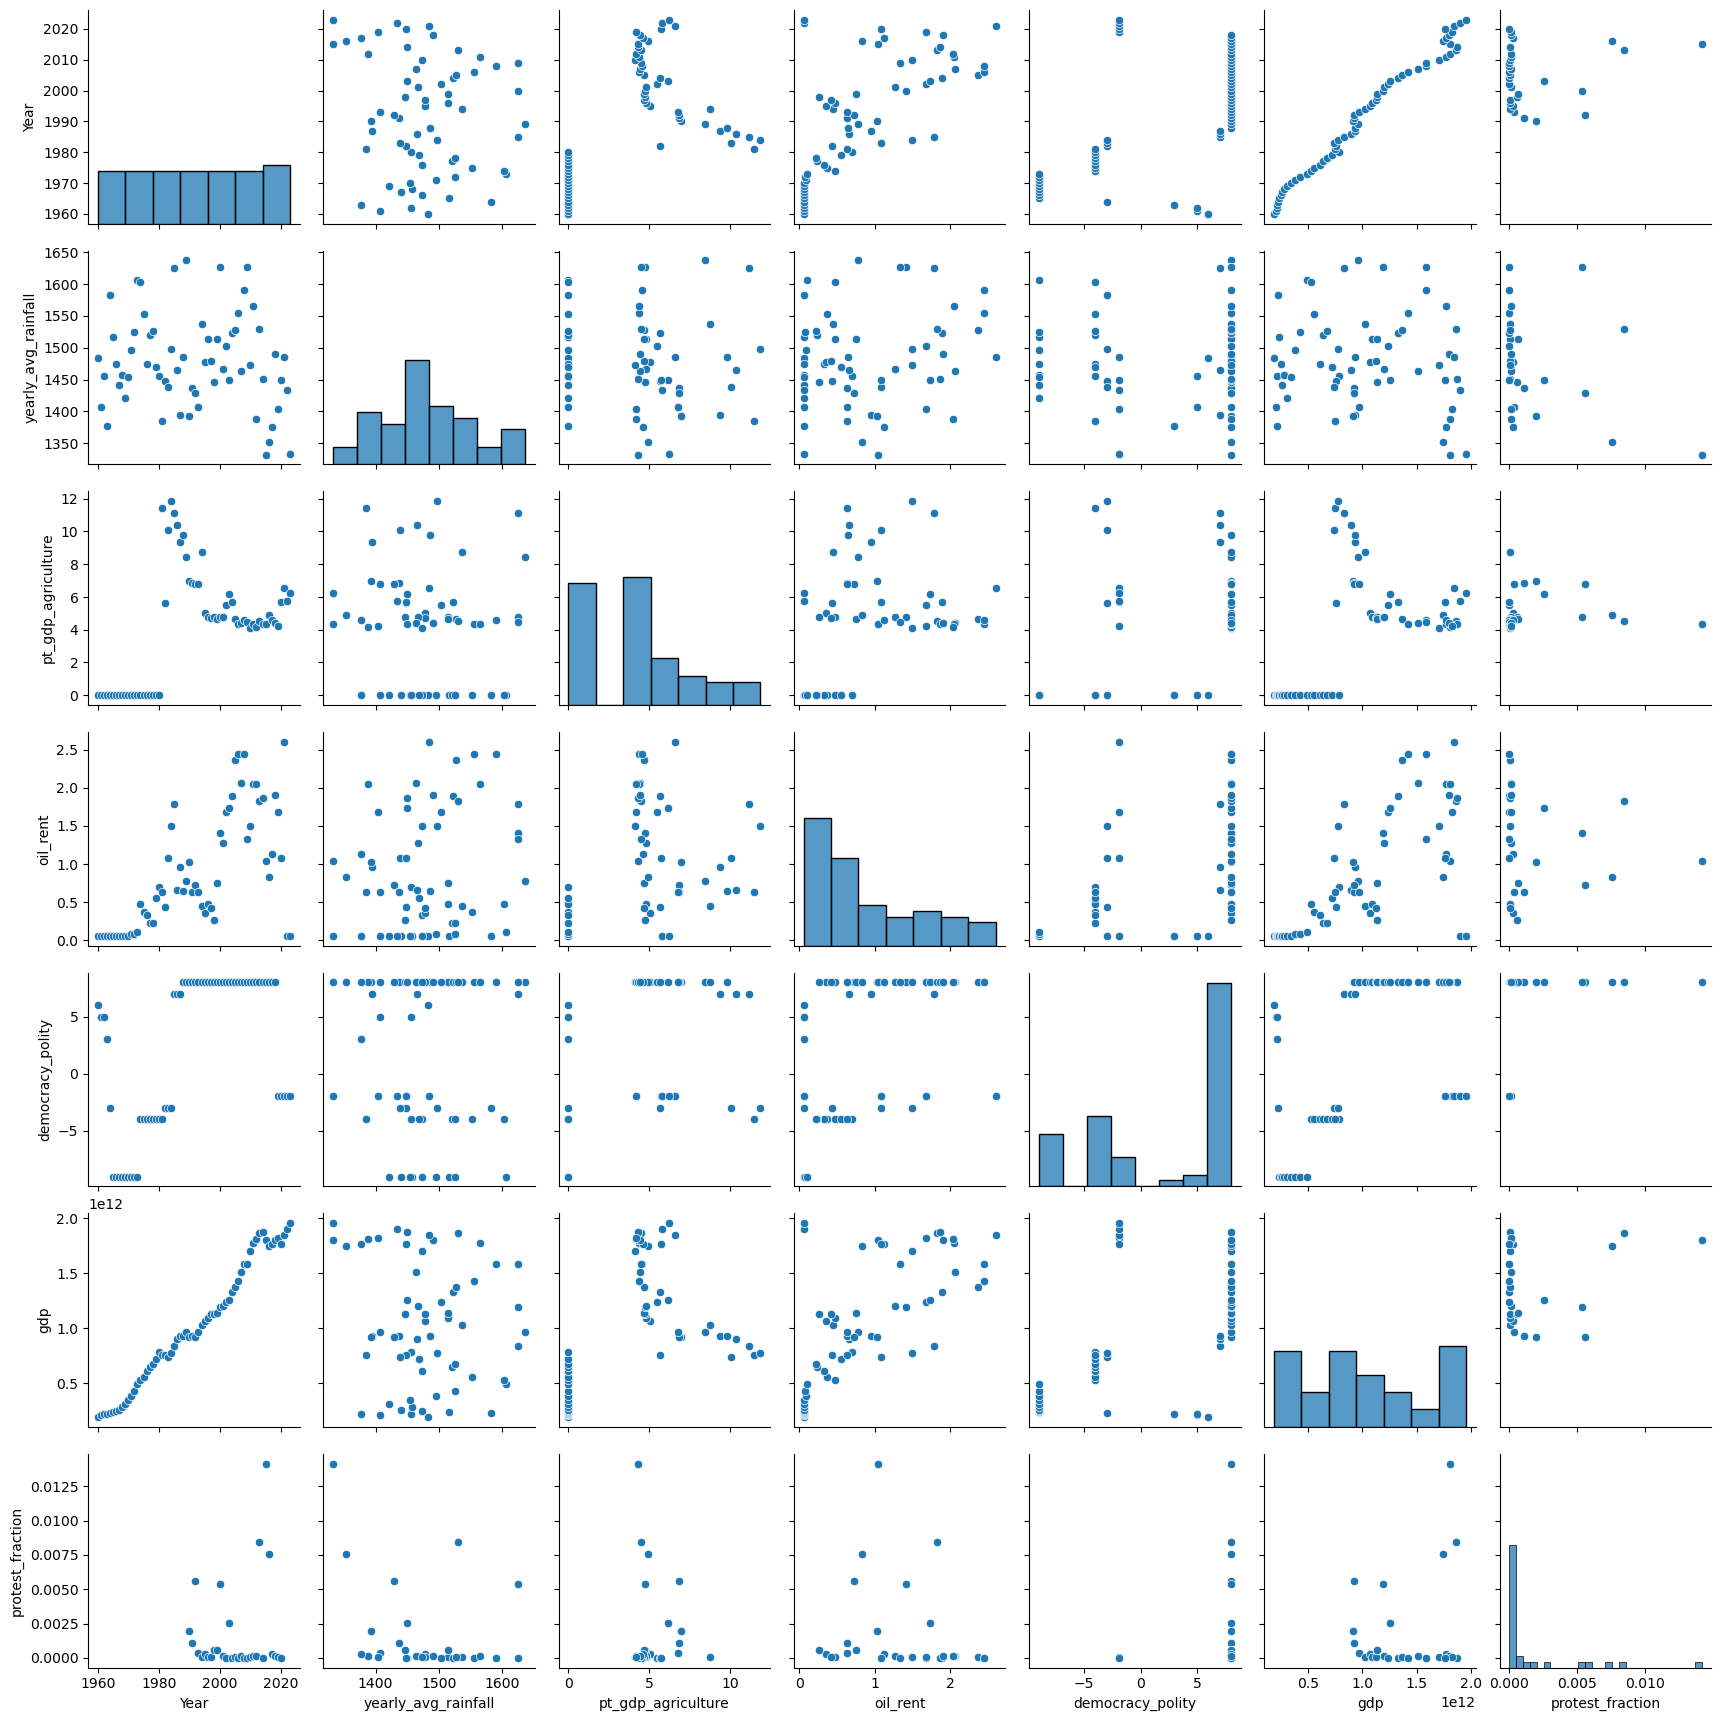

In [22]:
country = fulldf[fulldf['ISO3_code'] == 'BRA']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

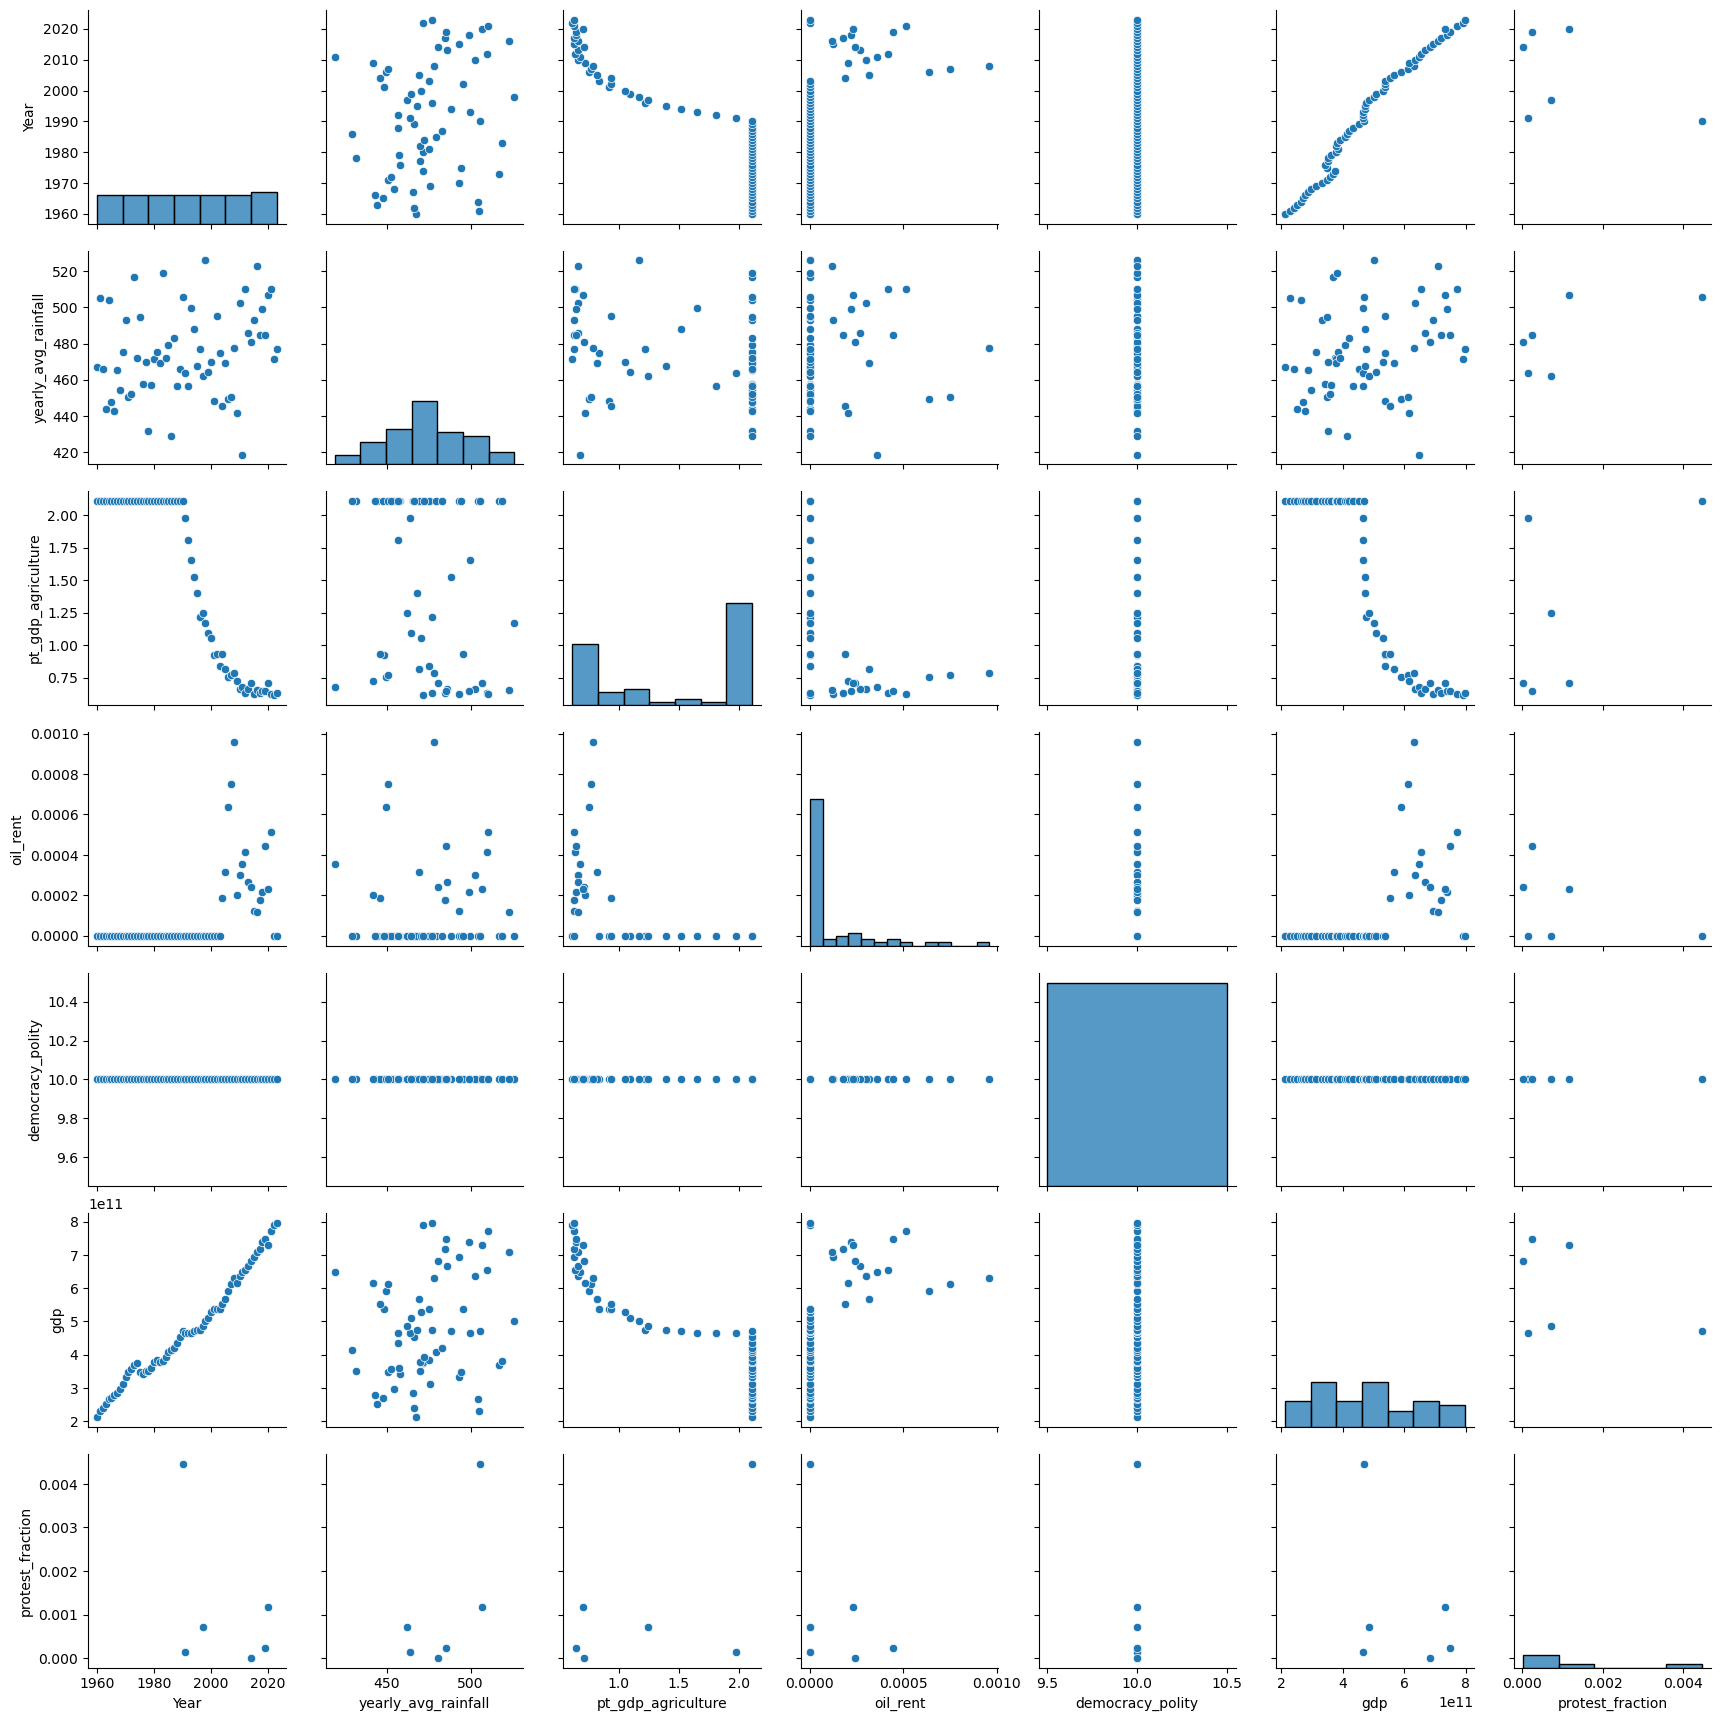

In [23]:
country = fulldf[fulldf['ISO3_code'] == 'CHE']
feats = ['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']

sns.pairplot(country[feats])

In [24]:
fulldf[fulldf['ISO3_code'] == 'CHE']

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
7927,CHE,1960,Switzerland,467.327264,0.080628,0.080628,62.807833,0.039202,0.039202,2.109859,...,NaN,61837.77,NaN,1.818,NaN,0.330546,NaN,NaN,NaN,NaN
7928,CHE,1961,Switzerland,505.006702,0.080628,0.080628,65.269998,0.039202,0.039202,2.109859,...,8.108669,61837.77,0.000000,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7929,CHE,1962,Switzerland,466.214217,-0.076816,0.080628,62.333901,-0.044984,0.039202,2.109859,...,4.789946,61837.77,0.000000,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7930,CHE,1963,Switzerland,443.840975,-0.047989,-0.076816,65.085014,0.044135,-0.044984,2.109859,...,4.879198,61837.77,0.000000,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
7931,CHE,1964,Switzerland,504.138918,0.135855,-0.047989,60.952078,-0.063501,0.044135,2.109859,...,5.256347,61837.77,0.000000,1.818,0.000000,0.330546,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,CHE,2019,Switzerland,484.999498,-0.028197,0.029430,75.876430,0.036670,-0.047245,0.647746,...,1.141978,80315.68,0.423089,4.394,-6.768513,0.339983,2.586823,8575280.0,2050.0,0.000239
7987,CHE,2020,Switzerland,506.837045,0.045026,-0.028197,75.511069,-0.004815,0.036670,0.705478,...,-2.141733,78023.34,-2.854162,4.817,9.626764,0.337379,-0.765955,8638167.0,10050.0,0.001163
7988,CHE,2021,Switzerland,510.413959,0.007057,0.045026,77.914134,0.031824,-0.004815,0.625932,...,5.391879,81603.21,4.588204,5.097,5.812747,0.330546,-2.025400,NaN,NaN,NaN
7989,CHE,2022,Switzerland,471.604969,-0.076034,0.007057,76.629072,-0.016493,0.031824,0.614575,...,2.568331,83007.28,1.720606,4.300,-15.636649,0.330546,0.000000,NaN,NaN,NaN


In [21]:
fulldf.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

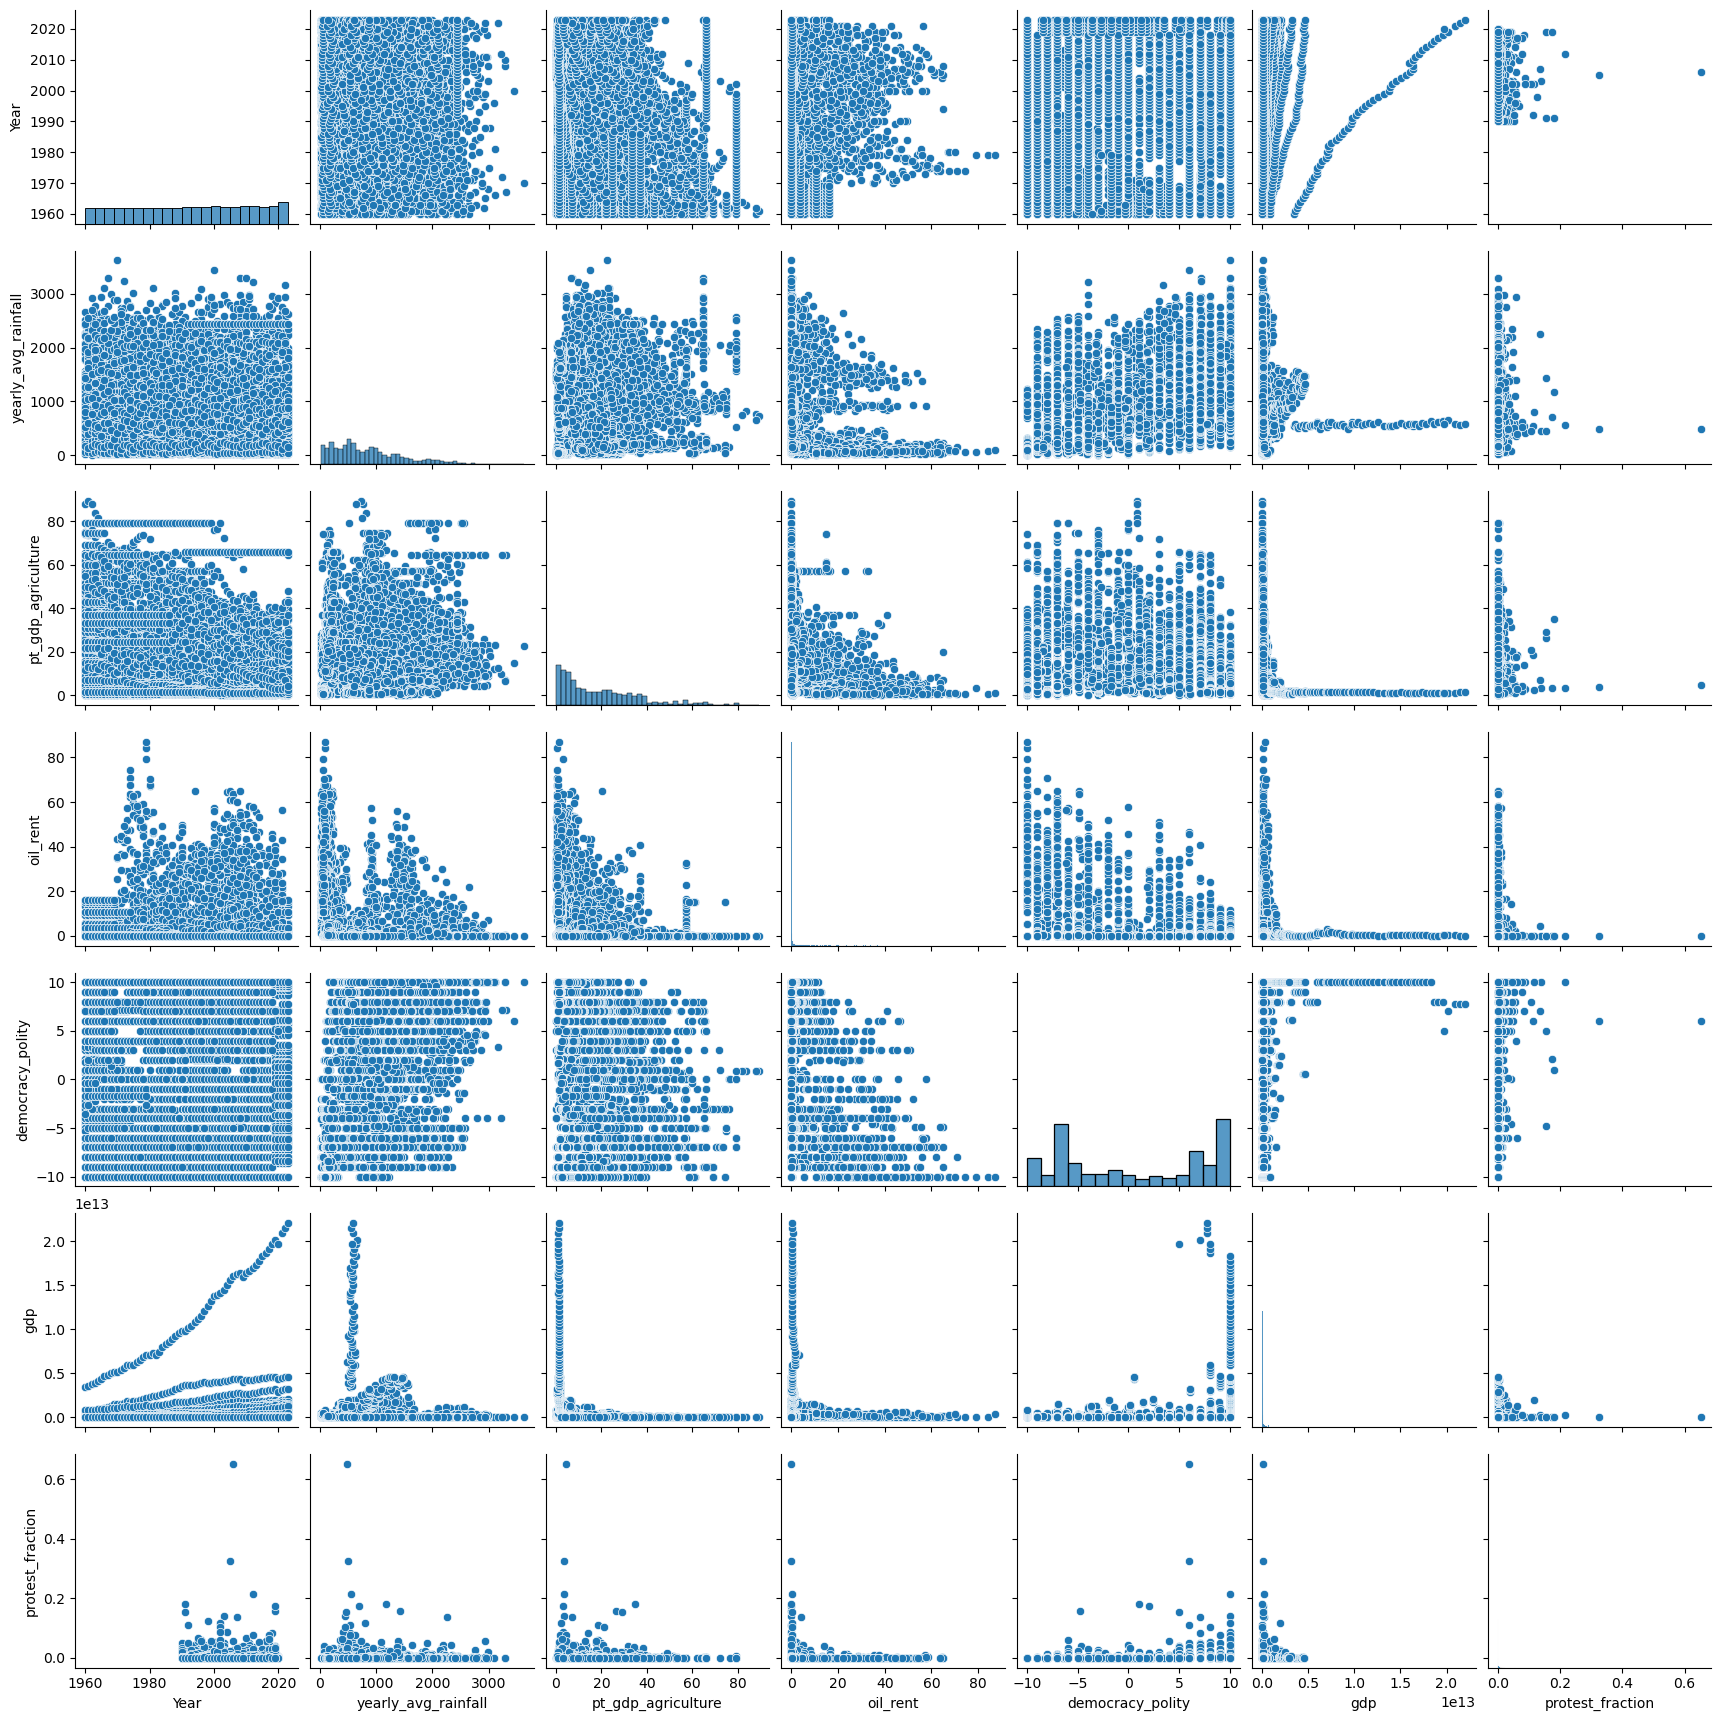

In [25]:
sns.pairplot(fulldf[['Year', 'yearly_avg_rainfall', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'protest_fraction']])